In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alissah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alissah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/alissah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('raw_data/counselchat-data.csv').copy()
# df = df.iloc[10:20, :]
# df.index = np.arange(len(df))
df.shape

(1658, 9)

In [3]:
df.isnull().sum()

questionID         2
questionTitle    167
questionText     272
questionUrl      175
topics           185
therapistName    175
therapistUrl     175
answerText       175
upvotes          180
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(1372, 9)

In [6]:
df['question'] = df['questionTitle'] + ' ' + df['questionText']
df[['question']].head()

,question
0,Escalating disagreements between mother and wi...
1,I'm addicted to smoking. How can I stop? I'm p...
2,Keeping secrets from my family I have secrets ...
3,The Underlying Causes of Being Possessive I am...
4,Can I control anxiety without medication? I ha...


#### No. of Questions

In [7]:
len(set(df['questionID'].tolist()))

711

#### No. of Answers per Question

In [8]:
df.groupby("questionID").agg("count")

,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes,question
questionID,,,,,,,,,
5566f94fa64752d71ec3ca64,6,6,6,6,6,6,6,6,6
5566f9a2a64752d71ec3ca67,2,2,2,2,2,2,2,2,2
5566fab2a64752d71ec3ca69,1,1,1,1,1,1,1,1,1
5567d26887a1cc0c3f3d8f46,1,1,1,1,1,1,1,1,1
556b6940c969ba5861709de4,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
58c61c8e98741803743bf6c9,1,1,1,1,1,1,1,1,1
58c61c9298741803743bf6ca,6,6,6,6,6,6,6,6,6
58c61c9598741803743bf6cb,13,13,13,13,13,13,13,13,13


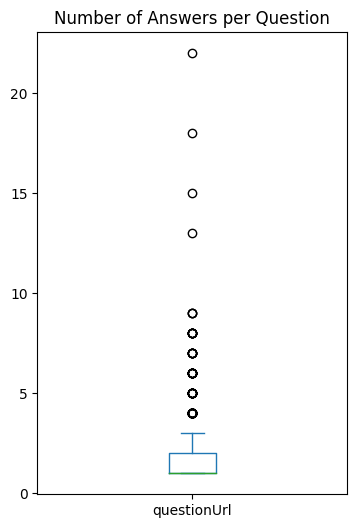

In [9]:
plt.figure(figsize=(4,6))
df.groupby("questionID").agg("count")['questionUrl'].plot.box()
plt.title('Number of Answers per Question');

## Encoding Columns

In [10]:
df.loc[:, 'topics'].value_counts()

Relationships                                                110
Depression                                                    65
Anxiety                                                       44
Counseling Fundamentals                                       39
Family Conflict                                               36
                                                            ... 
Relationship Dissolution ,Depression,Social Relationships      1
LGBTQ,Relationships,Intimacy                                   1
Anger Management,Social Relationships,Relationships            1
Depression,Anxiety,Behavioral Change,Marriage                  1
Relationships,Depression,Substance Abuse                       1
Name: topics, Length: 278, dtype: int64

In [11]:
max_topics = 5
df[[f'{num}' for num in np.arange(max_topics)]] = df['topics'].str.split(',', expand=True)

In [12]:
df.drop(columns='topics', inplace=True)

In [13]:
encoder = OneHotEncoder(sparse=False)
values = encoder.fit_transform(df[['0','1','2','4']])
df_0 = pd.DataFrame(values, columns=encoder.get_feature_names_out())

In [14]:
columns = []
for x in list(df_0.columns):
    x = re.sub(r"[_]+", '', x)
    x = re.sub(r'[0-9]+', '', x)
    columns.append(x)
    
columns_unique = list(set(columns))
len(columns_unique)

34

In [15]:
for column in columns_unique:
    df_0[column] = df_0.loc[:, df_0.columns.str.contains(column)].sum(axis=1)

In [16]:
df_0[columns_unique].shape

(1372, 34)

In [17]:
df[columns_unique] = df_0[columns_unique]
df.drop(columns=['0','1','2','3','4'], inplace=True)
df.shape

(1372, 43)

In [18]:
df.head()

,questionID,questionTitle,questionText,questionUrl,therapistName,therapistUrl,answerText,upvotes,question,Human Sexuality,...,Anxiety,Self-harm,Grief and Loss,Career Counseling,Anger Management,Spirituality,Children & Adolescents,Counseling Fundamentals,Alzheimer's,LGBTQ
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0.0,Escalating disagreements between mother and wi...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0.0,I'm addicted to smoking. How can I stop? I'm p...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0.0,Keeping secrets from my family I have secrets ...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0.0,The Underlying Causes of Being Possessive I am...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0.0,Can I control anxiety without medication? I ha...,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Text Preprocessing

### Cleaning Questions

In [19]:
df.loc[1, 'question']

"I'm addicted to smoking. How can I stop? I'm planning to have baby, so I have to quit smoking - but it's hard. Sometimes it's not a physical need, it's mental.\r\n\r\nI cannot help myself from thinking about smoking. What can I do to get rid of this addiction?"

In [20]:
def clean_question(question):
    question_1 = re.sub(r"[,.;@#?!&$/-]+", '', question) 
    question_2 = re.sub(r'[0-9]+', '', question_1)
    question_3 = re.sub(r'[^ \w\.]', '', question_2)
    return question_3.lower().strip()

In [21]:
df['question'] = df['question'].map(clean_question)

In [22]:
df.loc[1, 'question']

'im addicted to smoking how can i stop im planning to have baby so i have to quit smoking  but its hard sometimes its not a physical need its mentali cannot help myself from thinking about smoking what can i do to get rid of this addiction'

### Cleaning Answers

In [23]:
df.loc[1, 'answerText']

"<p>Hi. Good for you in planning ahead to do what's healthiest for your baby (and yourself). That's a great first step! It's also good that you are able to identify that it's not always a physical need that's driving the addiction.</p><p>For the next steps, I would suggest trying to figure out when the psychological cravings for a cigarette occur. The psychological (or mental) cravings are usually based out of habit, such as having a cigarette after a meal. And if you're consciously trying to quit, you'll find the craving starts with simply thinking about having a cigarette, then usually moves on to thinking about how good it made you feel, etc., etc. Well, if I'm on a diet and I continue to let myself think about the ice cream sitting in the freezer, eventually I'll give in and eat it.</p><p>You're going to have thoughts about smoking a cigarette. That's normal and, for the most part, out of your control. But you choose whether or not to CONTINUE thinking and dwelling about it after t

In [24]:
def clean_answer(answer):
    answer_1 = re.sub(r'[^\x00-\x7F]+',' ', answer)
    answer_2 = re.sub("<.*?>", " ", answer_1)
    answer_3 = re.sub(r"[,.;@#?!&$-/']+", ' ', answer_2) 
    answer_4 = re.sub(r'[0-9]+', ' ', answer_3)
    cleaned = answer_4.strip().lower()
    return cleaned

In [25]:
df['answerText'] = df['answerText'].map(clean_answer)
df.loc[1, 'answerText']

'hi  good for you in planning ahead to do what s healthiest for your baby  and yourself  that s a great first step  it s also good that you are able to identify that it s not always a physical need that s driving the addiction   for the next steps  i would suggest trying to figure out when the psychological cravings for a cigarette occur  the psychological  or mental  cravings are usually based out of habit  such as having a cigarette after a meal  and if you re consciously trying to quit  you ll find the craving starts with simply thinking about having a cigarette  then usually moves on to thinking about how good it made you feel  etc  etc  well  if i m on a diet and i continue to let myself think about the ice cream sitting in the freezer  eventually i ll give in and eat it   you re going to have thoughts about smoking a cigarette  that s normal and  for the most part  out of your control  but you choose whether or not to continue thinking and dwelling about it after that initial tho

### Tokenize and Lemmatize

In [26]:
answer_words = nltk.word_tokenize(df.loc[1, 'answerText'])
key_words = [ word for word in answer_words if not word in set(stopwords.words("english"))]
print(key_words, len(key_words))

['hi', 'good', 'planning', 'ahead', 'healthiest', 'baby', 'great', 'first', 'step', 'also', 'good', 'able', 'identify', 'always', 'physical', 'need', 'driving', 'addiction', 'next', 'steps', 'would', 'suggest', 'trying', 'figure', 'psychological', 'cravings', 'cigarette', 'occur', 'psychological', 'mental', 'cravings', 'usually', 'based', 'habit', 'cigarette', 'meal', 'consciously', 'trying', 'quit', 'find', 'craving', 'starts', 'simply', 'thinking', 'cigarette', 'usually', 'moves', 'thinking', 'good', 'made', 'feel', 'etc', 'etc', 'well', 'diet', 'continue', 'let', 'think', 'ice', 'cream', 'sitting', 'freezer', 'eventually', 'give', 'eat', 'going', 'thoughts', 'smoking', 'cigarette', 'normal', 'part', 'control', 'choose', 'whether', 'continue', 'thinking', 'dwelling', 'initial', 'thought', 'would', 'work', 'changing', 'initial', 'thought', 'acknowledge', 'ok', 'kind', 'want', 'cigarette', 'change', 'thoughts', 'typically', 'follow', 'distract', 'think', 'something', 'else', 'something

In [27]:
lemmatizer = WordNetLemmatizer()
key_words_lemme = [lemmatizer.lemmatize(
    lemmatizer.lemmatize(
        lemmatizer.lemmatize(word, 'n'), 
        'v'),
    'a') for word in key_words]
print(key_words_lemme, len(key_words_lemme))

['hi', 'good', 'plan', 'ahead', 'healthy', 'baby', 'great', 'first', 'step', 'also', 'good', 'able', 'identify', 'always', 'physical', 'need', 'drive', 'addiction', 'next', 'step', 'would', 'suggest', 'try', 'figure', 'psychological', 'crave', 'cigarette', 'occur', 'psychological', 'mental', 'crave', 'usually', 'base', 'habit', 'cigarette', 'meal', 'consciously', 'try', 'quit', 'find', 'crave', 'start', 'simply', 'think', 'cigarette', 'usually', 'move', 'think', 'good', 'make', 'feel', 'etc', 'etc', 'well', 'diet', 'continue', 'let', 'think', 'ice', 'cream', 'sit', 'freezer', 'eventually', 'give', 'eat', 'go', 'think', 'smoke', 'cigarette', 'normal', 'part', 'control', 'choose', 'whether', 'continue', 'think', 'dwell', 'initial', 'think', 'would', 'work', 'change', 'initial', 'think', 'acknowledge', 'ok', 'kind', 'want', 'cigarette', 'change', 'think', 'typically', 'follow', 'distract', 'think', 'something', 'else', 'something', 'else', 'whatever', 'take', 'get', 'mind', 'cigarette', '

In [28]:
def key_words(sentence):
    answer_words = nltk.word_tokenize(sentence)
    key_words = [ word for word in answer_words if not word in set(stopwords.words("english"))]
    return key_words

def lemmatize(key_words):
    lemmatizer = WordNetLemmatizer()
    key_words_lemme = [lemmatizer.lemmatize(
        lemmatizer.lemmatize(
            lemmatizer.lemmatize(word, 'n'), 
            'v'),
        'a') for word in key_words]
    return key_words_lemme

def bag_of_words(sentence):
    tokens = key_words(sentence)
    lemme = lemmatize(tokens)
    return lemme

In [29]:
df['lemmatized question'] = df['question'].map(bag_of_words)
print(df.loc[1, 'lemmatized question'])

['im', 'addict', 'smoke', 'stop', 'im', 'plan', 'baby', 'quit', 'smoke', 'hard', 'sometimes', 'physical', 'need', 'mentali', 'help', 'think', 'smoke', 'get', 'rid', 'addiction']


In [30]:
df['lemmatized answer'] = df['answerText'].map(bag_of_words)
print(df.loc[1, 'lemmatized answer'])

['hi', 'good', 'plan', 'ahead', 'healthy', 'baby', 'great', 'first', 'step', 'also', 'good', 'able', 'identify', 'always', 'physical', 'need', 'drive', 'addiction', 'next', 'step', 'would', 'suggest', 'try', 'figure', 'psychological', 'crave', 'cigarette', 'occur', 'psychological', 'mental', 'crave', 'usually', 'base', 'habit', 'cigarette', 'meal', 'consciously', 'try', 'quit', 'find', 'crave', 'start', 'simply', 'think', 'cigarette', 'usually', 'move', 'think', 'good', 'make', 'feel', 'etc', 'etc', 'well', 'diet', 'continue', 'let', 'think', 'ice', 'cream', 'sit', 'freezer', 'eventually', 'give', 'eat', 'go', 'think', 'smoke', 'cigarette', 'normal', 'part', 'control', 'choose', 'whether', 'continue', 'think', 'dwell', 'initial', 'think', 'would', 'work', 'change', 'initial', 'think', 'acknowledge', 'ok', 'kind', 'want', 'cigarette', 'change', 'think', 'typically', 'follow', 'distract', 'think', 'something', 'else', 'something', 'else', 'whatever', 'take', 'get', 'mind', 'cigarette', '